In [2]:
import numpy as np
import pandas as pd
import zipfile

In [3]:
zip_file = "Delhi_v2.csv.zip"
extract_file ="delhi_house"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_file)
    print("Extraction completed!")

Extraction completed!


In [4]:
data = pd.read_csv("delhi_house/Delhi_v2.csv")

In [5]:
data.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [6]:
data.shape

(7738, 18)

In [7]:
data.isnull().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [8]:
data.isna().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [9]:
data.drop(columns=["Lift"], inplace=True)

In [10]:
data.drop(columns=['parking'], inplace=True)

In [11]:
data.drop(columns=['Landmarks'], inplace=True)

In [12]:
data.drop(columns=['desc'], inplace=True)

In [13]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
data["Balcony_missing"] = data["Balcony"].isnull().astype(int)
data["Balcony"] = data["Balcony"].fillna(data["Balcony"].median())

In [15]:
data["Furnished_status"] = data["Furnished_status"].fillna("Unknown")

In [16]:
data["Status"] = data["Status"].fillna(data["Status"].mode()[0])

In [17]:
data.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Price_sqft,Balcony_missing
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.284699,5543.660241,0.332386
std,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,0.907924,2408.659307,0.471099
min,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,2100.000000,0.000000
25%,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,3950.986915,0.000000
50%,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,4972.674332,0.000000
75%,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,6350.638693,1.000000
max,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,44378.698225,1.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           7738 non-null   float64
 8   Status            7738 non-null   object 
 9   neworold          7738 non-null   object 
 10  Furnished_status  7738 non-null   object 
 11  type_of_building  7738 non-null   object 
 12  Price_sqft        7738 non-null   float64
 13  Balcony_missing   7738 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 846.5+ KB


In [19]:
data["Balcony"].value_counts()

Balcony
2.0     4365
3.0     1516
1.0     1082
4.0      613
5.0      130
6.0       21
7.0        4
10.0       3
8.0        3
9.0        1
Name: count, dtype: int64

In [20]:
data.to_csv("cleaned_delhi.csv", index=False)

In [21]:
numeric_corr = data.select_dtypes(include=['number']).corr()
print(numeric_corr["price"].sort_values(ascending=False))

price              1.000000
area               0.849073
Bathrooms          0.691990
Price_sqft         0.682768
Bedrooms           0.606914
Balcony            0.235497
Balcony_missing   -0.083214
latitude          -0.227517
longitude         -0.331883
Name: price, dtype: float64


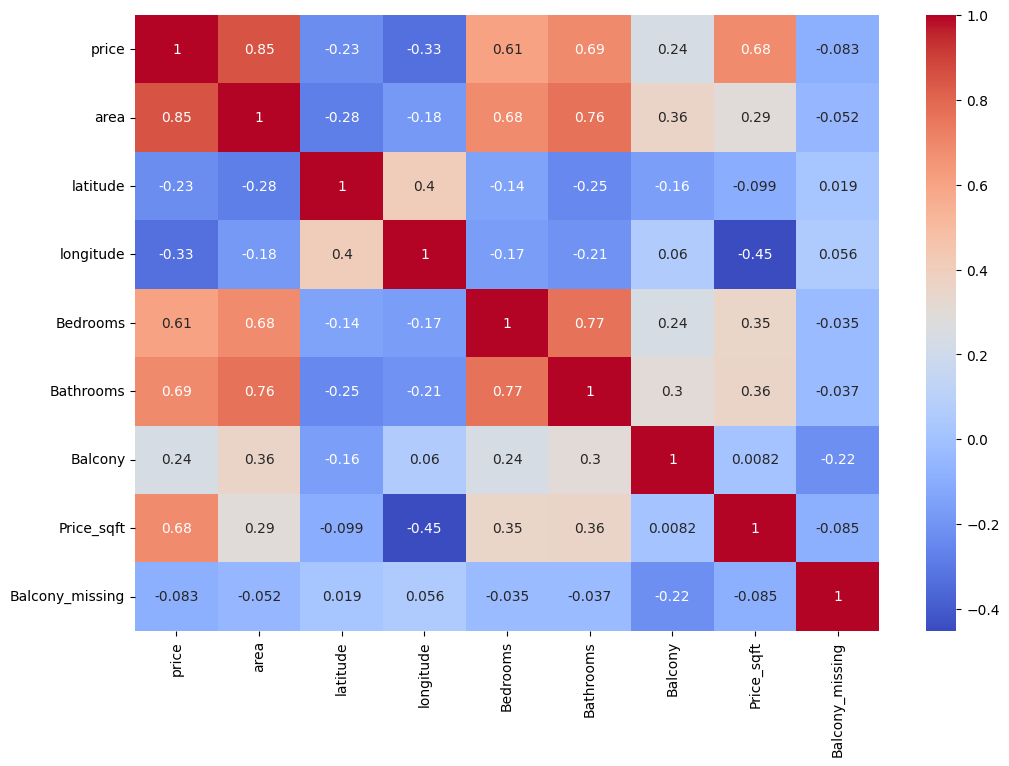

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm")
plt.show()

In [23]:
def extract_location(address):
    try:
        if pd.isna(address):
            return "unknown"

        parts = [p.strip().lower() for p in str(address).split(",")]

        # Usually locality appears second last
        if len(parts) >= 2:
            return parts[-2]

        return parts[0]

    except:
        return "unknown"


# Extract location
data["location"] = data["Address"].apply(extract_location)

# Clean text
data["location"] = (
    data["location"]
    .str.lower()
    .str.strip()
)

# Remove rare locations
location_counts = data["location"].value_counts()
common_locations = location_counts[location_counts >= 20].index

data["location"] = data["location"].apply(
    lambda x: x if x in common_locations else "other"
)



print("Unique Locations:", data["location"].nunique())
print(data["location"].value_counts())

Unique Locations: 12
location
ghaziabad             2096
gurgaon               1815
noida                 1094
greater noida          962
faridabad              472
new delhi - west       440
new delhi - south      330
new delhi - dwarka     188
new delhi - east       182
new delhi - rohini      81
new delhi - north       53
other                   25
Name: count, dtype: int64


In [24]:
if "Address" in data.columns:
    data.drop(columns=["Address"], inplace=True)

In [25]:
data.duplicated().sum()

np.int64(52)

In [26]:
data = data.drop_duplicates().reset_index(drop=True)

In [27]:
data.shape

(7686, 14)

In [28]:
data.isnull().sum().sort_values(ascending=False)

price               0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
Furnished_status    0
type_of_building    0
Price_sqft          0
Balcony_missing     0
location            0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

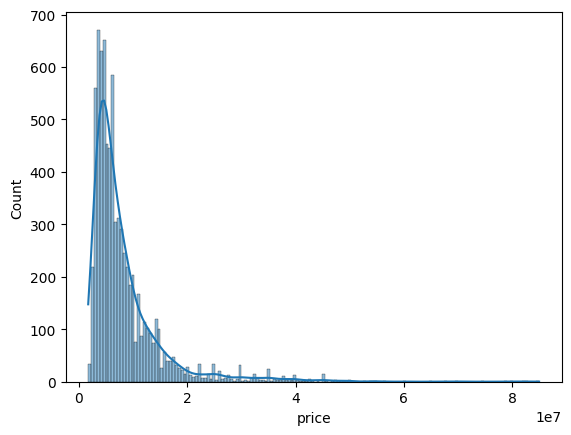

In [29]:
sns.histplot(data['price'], kde=True)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [31]:
y = np.log(data["price"])
X = data.drop("price", axis=1)
data["price"] = np.log(data["price"])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(6148, 13)
(1538, 13)


In [34]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)

pipe_lr = make_pipeline(
    column_trans,
    StandardScaler(),
    LinearRegression()
)

In [35]:
pipe_lr.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
y_pred_lr = pipe_lr.predict(X_test)

In [37]:
r2_score(y_test,y_pred_lr)

0.892737525810244

In [38]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)
pipe = make_pipeline(
    column_trans,
    StandardScaler(),
    Ridge(alpha=1.0)
)

pipe.fit(X_train, y_train)
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.8927662810126922

In [39]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)
pipe = make_pipeline(
    column_trans,
    StandardScaler(),
    LassoCV(cv=5)
)

pipe.fit(X_train, y_train)
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.8936811901932483

In [40]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)
pipe = make_pipeline(
    column_trans,
    StandardScaler(),
    ElasticNetCV(cv=5)
)

In [50]:
y_pred_elastic = pipe.predict(X_test)

In [49]:
pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
r2_score(y_test,y_pred_elastic)

In [41]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)

pipe_rf = make_pipeline(
    column_trans,
    RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    )
)

In [42]:
pipe_rf.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [43]:
rf_pred = pipe_rf.predict(X_test)

In [44]:
r2_score(y_test, rf_pred)

0.9985993204560283

In [45]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)

xgb_pipe = make_pipeline(
    column_trans,
    XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
)

In [46]:
xgb_pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [47]:
xgb_pred = xgb_pipe.predict(X_test)

In [48]:
r2_score(y_test, xgb_pred)

0.997064621466013

In [52]:
print("Lasso: ", r2_score(y_test, y_pred_lasso))
print("Ridge: ", r2_score(y_test, y_pred_ridge))
print("ElasticNet: ", r2_score(y_test, y_pred_elastic))
print("Linear:", pipe_lr.score(X_test, y_test))
print("Random Forest:", pipe_rf.score(X_test, y_test))
print("XGBoost:", xgb_pipe.score(X_test, y_test))

Lasso:  0.8936811901932483
Ridge:  0.8927662810126922
ElasticNet:  0.8937529823958966
Linear: 0.892737525810244
Random Forest: 0.9985993204560283
XGBoost: 0.997064621466013


In [53]:
import pickle

In [54]:
pickle.dump(pipe, open("RidgeModel.pkl", "wb"))

In [55]:
print(data.corr()["price"].sort_values(ascending=False))

ValueError: could not convert string to float: 'Under Construction'